<a href="https://colab.research.google.com/github/kirillcray/backend_test_homework/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


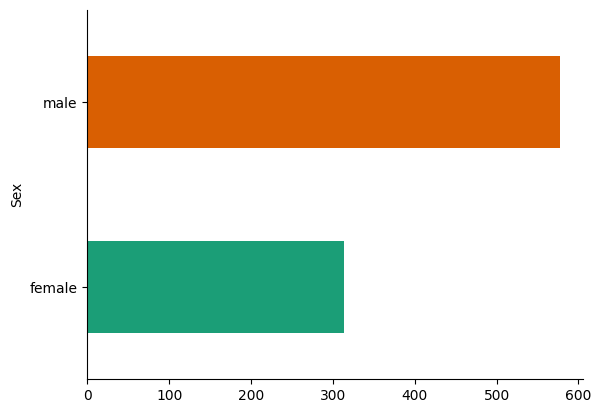

In [5]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='Frequency'>

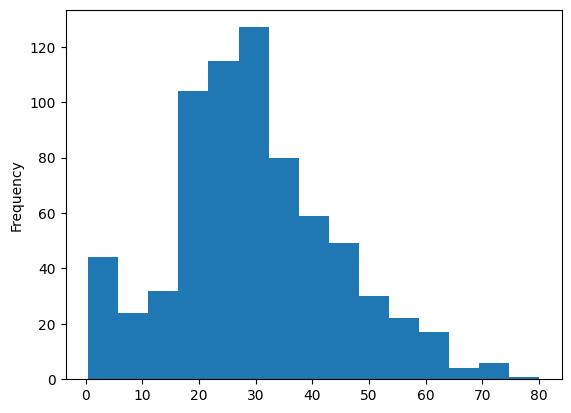

In [6]:
df['Age'].plot(kind = 'hist', bins = 15)

<Axes: ylabel='Frequency'>

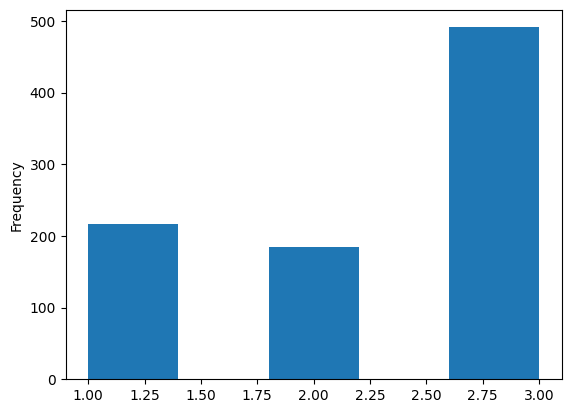

In [7]:
df['Pclass'].plot(kind = 'hist', bins = 5)

<Axes: ylabel='Frequency'>

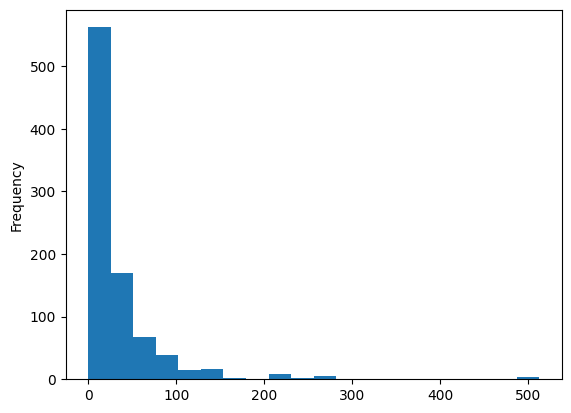

In [8]:
df['Fare'].plot(kind = 'hist', bins = 20)

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
for i in df['Sex'].unique():
  df.loc[(df['Sex'] == i) & (df['Age'].isna()), 'Age'] = df.loc[(df['Sex'] == i), 'Age'].median()
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
median_fares = df.groupby('Embarked')['Fare'].median()
df.loc[df['Embarked'].isna(), 'Embarked'] = df.loc[df['Embarked'].isna(), 'Fare'].apply(lambda fare: median_fares.sub(fare).abs().idxmin())
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
x = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].apply(lambda i:x[i])

In [13]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
pd.get_dummies(df['AgeGroup'])
df = pd.concat([df, pd.get_dummies(df['AgeGroup']).astype(int)], axis=1)

In [14]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Child,Teen,YoungAdult,Adult,Senior
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,YoungAdult,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,YoungAdult,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adult,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adult,0,0,0,1,0
5,6,0,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,NaN,Q,YoungAdult,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,Senior,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,Child,1,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,YoungAdult,0,0,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,Teen,0,1,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
#нормализация столбца Age и Fare
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Child,Teen,YoungAdult,Adult,Senior
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.571902,1,0,A/5 21171,-0.502445,NaN,S,YoungAdult,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.657785,1,0,PC 17599,0.786845,C85,C,Adult,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.264480,0,0,STON/O2. 3101282,-0.488854,NaN,S,YoungAdult,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.427219,1,0,113803,0.420730,C123,S,Adult,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,0.427219,0,0,373450,-0.486337,NaN,S,Adult,0,0,0,1,0


In [16]:
column_target = ['Survived']
column_train = ['Pclass', 'Sex', 'Fare', 'Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']

Y = df[column_target]
X = df[column_train]
df[column_target + column_train]

,Survived,Pclass,Sex,Fare,Child,Teen,YoungAdult,Adult,Senior
0,0,3,0,-0.502445,0,0,1,0,0
1,1,1,1,0.786845,0,0,0,1,0
2,1,3,1,-0.488854,0,0,1,0,0
3,1,1,1,0.420730,0,0,0,1,0
4,0,3,0,-0.486337,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.386671,0,0,1,0,0
887,1,1,1,-0.044381,0,0,1,0,0
888,0,3,1,-0.176263,0,0,1,0,0
889,1,1,0,-0.044381,0,0,1,0,0


In [17]:
corr = df[column_target + column_train].corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Fare,Child,Teen,YoungAdult,Adult,Senior
Survived,1.000000,-0.338481,0.543351,0.257307,0.116691,0.026859,-0.108818,0.049329,-0.022932
Pclass,-0.338481,1.000000,-0.131900,-0.549500,0.114087,0.061877,0.217690,-0.203744,-0.253606
Sex,0.543351,-0.131900,1.000000,0.182333,0.067534,0.098941,-0.068266,0.005651,-0.050538
Fare,0.257307,-0.549500,0.182333,1.000000,-0.003896,0.007332,-0.141760,0.120349,0.063857
Child,0.116691,0.114087,0.067534,-0.003896,1.000000,-0.084599,-0.290704,-0.176417,-0.080598
Teen,0.026859,0.061877,0.098941,0.007332,-0.084599,1.000000,-0.292981,-0.177799,-0.081230
YoungAdult,-0.108818,0.217690,-0.068266,-0.141760,-0.290704,-0.292981,1.000000,-0.610962,-0.279125
Adult,0.049329,-0.203744,0.005651,0.120349,-0.176417,-0.177799,-0.610962,1.000000,-0.169391
Senior,-0.022932,-0.253606,-0.050538,0.063857,-0.080598,-0.081230,-0.279125,-0.169391,1.000000


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [20]:
logreg = LogisticRegression() # Логистическая регрессия
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
randfor = RandomForestClassifier() # Случайный лес
randfor.fit(X_train, Y_train)
y_pred_randfor = randfor.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [22]:
svcmodel = SVC() # Метод опорных векторов
svcmodel.fit(X_train, Y_train)
y_pred_svcmodel = svcmodel.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
lsvcmodel = LinearSVC() # Метод опорных векторов (линейный)
lsvcmodel.fit(X_train, Y_train)
y_pred_lsvcmodel = lsvcmodel.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
knnmodel = KNeighborsClassifier() # K-ближайших соседей
knnmodel.fit(X_train, Y_train)
y_pred_knnmodel = knnmodel.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [25]:
xgb_model = XGBClassifier() # Градиентный спуск
xgb_model.fit(X_train, Y_train.values.ravel())
y_pred_xgb = xgb_model.predict(X_test)

In [26]:
# Оценка моделей
print('Accuracy')
print(f'Логистическая регрессия: {accuracy_score(Y_test, y_pred_logreg):.5f}')
print(f'Случайный лес: {accuracy_score(Y_test, y_pred_randfor):.5f}')
print(f'Метод опорных векторов: {accuracy_score(Y_test, y_pred_svcmodel):.5f}')
print(f'Метод опорных векторов (линейный): {accuracy_score(Y_test, y_pred_lsvcmodel):.5f}')
print(f'K-ближайших соседей: {accuracy_score(Y_test, y_pred_knnmodel):.5f}')
print(f'Градиентный спуск: {accuracy_score(Y_test, y_pred_xgb):.5f}')

print()
print('Precision')
print(f'Логистическая регрессия: {precision_score(Y_test, y_pred_logreg):.5f}')
print(f'Случайный лес: {precision_score(Y_test, y_pred_randfor):.5f}')
print(f'Метод опорных векторов: {precision_score(Y_test, y_pred_svcmodel):.5f}')
print(f'Метод опорных векторов (линейный): {precision_score(Y_test, y_pred_lsvcmodel):.5f}')
print(f'K-ближайших соседей: {precision_score(Y_test, y_pred_knnmodel):.5f}')
print(f'Градиентный спуск: {precision_score(Y_test, y_pred_xgb):.5f}')

print()
print('Recall')
print(f'Логистическая регрессия: {recall_score(Y_test, y_pred_logreg):.5f}')
print(f'Случайный лес: {recall_score(Y_test, y_pred_randfor):.5f}')
print(f'Метод опорных векторов: {recall_score(Y_test, y_pred_svcmodel):.5f}')
print(f'Метод опорных векторов (линейный): {recall_score(Y_test, y_pred_lsvcmodel):.5f}')
print(f'K-ближайших соседей: {recall_score(Y_test, y_pred_knnmodel):.5f}')
print(f'Градиентный спуск: {recall_score(Y_test, y_pred_xgb):.5f}')

print()
print('F1-score')
print(f'Логистическая регрессия: {f1_score(Y_test, y_pred_logreg):.5f}')
print(f'Случайный лес: {f1_score(Y_test, y_pred_randfor):.5f}')
print(f'Метод опорных векторов: {f1_score(Y_test, y_pred_svcmodel):.5f}')
print(f'Метод опорных векторов (линейный): {f1_score(Y_test, y_pred_lsvcmodel):.5f}')
print(f'K-ближайших соседей: {f1_score(Y_test, y_pred_knnmodel):.5f}')
print(f'Градиентный спуск: {f1_score(Y_test, y_pred_xgb):.5f}')


Accuracy
Логистическая регрессия: 0.80339
Случайный лес: 0.82712
Метод опорных векторов: 0.79661
Метод опорных векторов (линейный): 0.80678
K-ближайших соседей: 0.80678
Градиентный спуск: 0.82373

Precision
Логистическая регрессия: 0.78182
Случайный лес: 0.80531
Метод опорных векторов: 0.77778
Метод опорных векторов (линейный): 0.78378
K-ближайших соседей: 0.80583
Градиентный спуск: 0.83333

Recall
Логистическая регрессия: 0.71667
Случайный лес: 0.75833
Метод опорных векторов: 0.70000
Метод опорных векторов (линейный): 0.72500
K-ближайших соседей: 0.69167
Градиентный спуск: 0.70833

F1-score
Логистическая регрессия: 0.74783
Случайный лес: 0.78112
Метод опорных векторов: 0.73684
Метод опорных векторов (линейный): 0.75325
K-ближайших соседей: 0.74439
Градиентный спуск: 0.76577


In [27]:
from sklearn.model_selection import GridSearchCV
# Задаем сетку параметров
param_grid = {
    'C': [0.1, 1, 10, 100],  # Регуляризация
    'kernel': ['linear', 'rbf', 'poly'],  # Тип ядра
    'gamma': ['scale', 'auto']  # Гиперпараметр для rbf/poly
}

# Запускаем GridSearchCV
grid_search_svc = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train, Y_train.values.ravel())

# Выводим лучший вариант
print("Лучшие параметры SVC:", grid_search_svc.best_params_)
print("Лучшая точность:", grid_search_svc.best_score_)

Лучшие параметры SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Лучшая точность: 0.8003781512605042
